<a href="https://colab.research.google.com/github/Alvaro-Cavadia/LangChain_Python/blob/main/LangChain_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

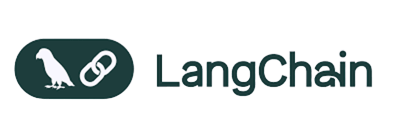

#**LangChain**

LangChain es un framework diseñado para simplificar el desarrollo de aplicaciones impulsadas por Modelos de Lenguaje Grandes (LLMs), permitiendo a los desarrolladores encadenar componentes de forma modular, como el historial de conversaciones, el acceso a datos externos, y la ejecución de herramientas, facilitando la creación de asistentes sofisticados con memoria y capacidad de razonamiento complejo.

## Configuración de la API_KEY

In [ ]:
import os
from openai import OpenAI

os.environ["OPENAI_API_KEY"] = "xxxxxxxxx"
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

## **Instalación de LangChain y OpenAI**

In [ ]:
!pip install -U langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.2/471.2 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.27
    Uninstalling langchain-0.3.27:
      Successfully uninstalled langchain-0.3.27


In [ ]:
!pip install -U langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00


## **Componentes**

### Modelos

Los LLM son potentes herramientas de IA que pueden interpretar y generar texto como los humanos. Son lo suficientemente versátiles como para redactar contenido, traducir idiomas, resumir y responder preguntas sin necesidad de formación especializada para cada tarea.

Los modelos son el motor de razonamiento de los agentes . Impulsan su proceso de toma de decisiones, determinando qué herramientas utilizar, cómo interpretar los resultados y cuándo proporcionar una respuesta final.



#### Inicialización de un modelo

La forma más fácil de comenzar con un modelo independiente en LangChain es inicializar `init_chat_model` de un proveedor de su elección (ejemplos  continuación):

In [ ]:
from langchain.chat_models import init_chat_model
model = init_chat_model("gpt-xxx")

Usando el metodo `invoke` se llama al modelo para hacerle una consulta



In [ ]:
response = model.invoke("¿Qué es optimización?")

para acceder solo al texto de la respuesta, se debe usar el atributo `.content`, de lo contrario, tambien se obtendrá información adicional (metadatos como el uso de tokens)

In [ ]:
response.content

'La optimización es un proceso matemático y computacional que busca encontrar el mejor resultado o la mejor solución posible dentro de un conjunto de restricciones y condiciones. Se utiliza en diversas áreas, como la economía, la ingeniería, la logística y la inteligencia artificial, entre otras.\n\nExisten dos componentes clave en la optimización:\n\n1. **Función objetivo**: Es la función que se desea maximizar o minimizar. Por ejemplo, maximizar las ganancias, minimizar costos, o minimizar el tiempo de producción.\n\n2. **Restricciones**: Son las condiciones o limitaciones que deben cumplirse dentro del problema. Pueden ser de naturaleza física, económica, técnica, etc.\n\nLa optimización puede ser de muchos tipos y abarcar diversas técnicas, como la programación lineal, programación no lineal, algoritmos genéticos, entre otros.\n\nEn resumen, la optimización tiene como objetivo encontrar la mejor solución posible bajo un conjunto de restricciones, maximizar o minimizar una función o

#### Parámetros

Un modelo de chat acepta parámetros que permiten configurar su comportamiento. El conjunto completo de parámetros admitidos varía según el modelo y el proveedor, pero los estándar incluyen:


*   `model` el nombre o identificador del modelo específico que desea utilizar con un proveedor.
*   `api_key` clave necesaria para autenticarse con el proveedor del modelo. Generalmente se emite al registrarse para acceder al modelo. A menudo se accede configurando unavariable de entorno.
*   `temperature` Controla la aleatoriedad de la salida del modelo. Un número alto hace que las respuestas sean más creativas; un número bajo las hace más deterministas.
*   `timeout` El tiempo máximo (en segundos) para esperar una respuesta del modelo antes de cancelar la solicitud.
*   `max_tokens` Limita el número total de tokens en la respuesta, controlando efectivamente cuánto tiempo puede durar la salida.
*   `max_retries` La cantidad máxima de intentos que realizará el sistema para reenviar una solicitud si falla debido a problemas como tiempos de espera de la red o límites de velocidad.


In [ ]:
model = init_chat_model(
    "gpt-xxx",
    temperature=0.7,
    timeout=30,
    max_tokens=300,
)

### Mensajes

Los mensajes son la unidad fundamental de contexto para los modelos en LangChain. Representan la entrada y la salida de los modelos, y contienen tanto el contenido como los metadatos necesarios para representar el estado de una conversación al interactuar con un LLM.


*   **Indicaciones de texto** son cadenas, ideales para tareas de generación sencillas en las que no es necesario conservar el historial de conversaciones.
*   **Indicaciones de mensajes** Alternativamente, puede pasar una lista de mensajes al modelo proporcionando una lista de objetos de mensaje (forma nativa de LangChain).
*   **Formato de diccionario** También puede especificar mensajes directamente en el formato de diccionario, el cual es el que comunmente se usa para las APIs.




#### Indicaciones de texto

Es basicamente lo que se hizo al inicio.

In [ ]:
#response = model.invoke("¿Qué es optimización?")

#### Indicaciones de mensajes

In [ ]:
from langchain.messages import SystemMessage, HumanMessage, AIMessage

messages = [
    SystemMessage("Eres un experto en optimización"), # Esto le dice al LLM que debe asumir el rol de un experto en optimización
    HumanMessage("¿Qué es una restricción?"),         # Esta es la petición real del usuario.
    AIMessage("Según Hillier y Lieberman ...")        # Este es un fragmento de respuesta anterior (o una respuesta parcial) del modelo.
]
response = model.invoke(messages)

In [ ]:
response.content

'Una restricción, en el contexto de la optimización y la programación matemática, se refiere a una limitación o condición que debe cumplirse en un problema específico. Estas restricciones pueden ser de diferentes tipos, como:\n\n1. **Restricciones de igualdad**: Imponen que dos expresiones sean iguales. Por ejemplo, \\(x + y = 10\\).\n\n2. **Restricciones de desigualdad**: Establecen que una expresión debe ser mayor o menor que otra. Por ejemplo, \\(x - y \\leq 5\\) o \\(x + y \\geq 3\\).\n\n3. **Restricciones de no negatividad**: Especifican que ciertas variables deben ser mayores o iguales a cero, como \\(x \\geq 0\\).\n\nLas restricciones son fundamentales en la formulación de problemas de optimización, ya que definen el espacio de soluciones posibles y ayudan a encontrar la mejor solución bajo las condiciones dadas. En un problema típico de programación lineal, por ejemplo, se busca maximizar o minimizar una función objetivo sujeta a un conjunto de restricciones.'

#### Formato de diccionario

In [ ]:
## Se obtendrá la misma respuesta que la anterior

# messages = [
#     {"role": "system", "content": "Eres un experto en optimización"},
#     {"role": "user", "content": "¿Qué es una restricción?"},
#     {"role": "assistant", "content": "Según Hillier y Lieberman ..."}
# ]
# response = model.invoke(messages)

In [ ]:
## Se obtendrá la misma respuesta que la anterior

messages = [
    {"role": "system", "content": "Eres un metematico que no quiere resolver sumas manualmente"},
    {"role": "user", "content": "¿cuanto es 5 + 8 ?"}
]
response = model.invoke(messages)

#### **Tipos de mensajes**

Existen diferentes tipos de mensajes:

*   `SystemMessage` : le indica al modelo cómo comportarse y proporciona contexto para las interacciones.

*    `HumanMessage` : representa la entrada del usuario y las interacciones con el modelo.
*   `AIMessage`  : respuestas generadas por el modelo, incluido contenido de texto, llamadas de herramientas y metadatos

*   `ToolMessage` : representa las salidas de las llamadas de herramienta (se explicarà en la secciòn de herramientas)



El uso de los mensajes puede llegar a ser complejo, pero inicialmente es suficiente con conocer lo mencionado en indicaciones de mensaje y formato de diccionario.

### Herramientas

Las herramientas son componentes que los agentes invocan para realizar acciones. Amplían las capacidades del modelo al permitirles interactuar con el mundo mediante entradas y salidas bien definidas. Las herramientas encapsulan una función invocable y su esquema de entrada. Estos se pueden pasar a modelos de chat compatibles , lo que permite al modelo decidir si invocar una herramienta y con qué argumentos.

####**Crear Herramientas**

La forma más sencilla de crear una herramienta es con `@tool`. De forma predeterminada, la cadena de documentación de la función se convierte en la descripción de la herramienta, lo que ayuda al modelo a comprender cuándo usarla.

In [ ]:
from langchain.tools import tool

# Herramienta

@tool
def sumar_numeros(a: int, b: int) -> str:
    """Suma dos números enteros (A y B). Útil cuando se necesita realizar una operación aritmética de suma."""
    resultado = a + b
    return f"El resultado de sumar {a} y {b} es: {resultado}"

print(sumar_numeros.invoke({"a": 15, "b": 27}))


El resultado de sumar 15 y 27 es: 42




*   La herramienta `sumar_numeros` recibe como argumentos a y b
*   Tiene una descripción, la cual es util para el razonamiento del modelo, el cual decidirá si usarla.
*   `sumar_numeros.invoke` llama a la función y debe recibir un diccionario con los parametos de la función.












#### **Llamar herramientas usando un modelo**

Se pueden usar las herramientas con un modelo sin implementar un agente.

Para que las herramientas definidas estén disponibles para un modelo, debe vincularlas mediante bind_tools(). En invocaciones posteriores, el modelo puede optar por llamar a cualquiera de las herramientas vinculadas según sea necesario.

In [ ]:
model_with_tools = model.bind_tools([sumar_numeros])

En este caso `response` no generará directamente la respuesta, pero se encargará de dos cosas importantes:


*   Analizar el contenido del texto proporcionado.
*   Decidir si utilizar la herramienta disponible, y en caso de aplicar la herramienta, debe proporcionar los parametros para `sumar_numeros`.



In [ ]:
response = model_with_tools.invoke("Devuelve el resultado de la suma de 5 y 8")


In [ ]:
response

AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 81, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CV55146vHSMUKc7WakmWGdofXCoqn', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--0b20da74-7dc1-40df-874e-c7bd5cc038d5-0', tool_calls=[{'name': 'sumar_numeros', 'args': {'a': 5, 'b': 8}, 'id': 'call_c70djQcbsC31jjVEwGOHpl31', 'type': 'tool_call'}], usage_metadata={'input_tokens': 81, 'output_tokens': 21, 'total_tokens': 102, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

`response.tool_calls` es una lista que contiene un diccionario con la información relevante de la función `Sumar_numeros`. Se accede aellos mediante un ciclo para verificar si realmente se está llamando la función y que le está pasando el modelo.

In [ ]:
for tool_call in response.tool_calls:
    print(f"Tool: {tool_call['name']}")
    print(f"Args: {tool_call['args']}")

Tool: sumar_numeros
Args: {'a': 5, 'b': 8}


In [ ]:
# Ejecutamos la función Python usando los argumentos extraídos
tool_result = sumar_numeros.invoke(tool_call['args'])

print("\n--- Ejecución de la Tool ---")
print(f"Resultado de la Tool (Observation): {tool_result}")


--- Ejecución de la Tool ---
Resultado de la Tool (Observation): El resultado de sumar 5 y 8 es: 13


#### **Bucle de ejecución de herramientas**

Cuando un modelo devuelve llamadas a herramientas, es necesario ejecutarlas y devolverle los resultados. Esto crea un bucle de conversación donde el modelo puede usar los resultados de las herramientas para generar su respuesta final. LangChain incluye abstracciones de agente que gestionan esta orquestación.

In [ ]:
# Ejemplo parecido al anterior
model_with_tools = model.bind_tools([sumar_numeros])

# El modelo genera la llamada a la herramienta
messages = [{"role": "user", "content": "Devuelve el resultado de la suma de 10 y 12"}]
ai_msg = model_with_tools.invoke(messages)
# Guarda la llamada de la herramienta en messages
messages.append(ai_msg)

# Ciclo de ejecución
for tool_call in ai_msg.tool_calls:
    # Ejecución de la herraienta con los argumentos generados
    tool_result = sumar_numeros.invoke(tool_call)
    # Guarda el resultado de la herramenta en messages
    messages.append(tool_result)

# Los resultados regresan al modelo para que este genere una respuesta basandose en todo el contenido de messages
final_response = model_with_tools.invoke(messages)
# .test asegura que se imprima solo el texto de la respuesta
print(final_response.text)


El resultado de sumar 10 y 12 es: 22.


Parece que funciona igual que cuando se genera la respuesta desde la herramienta, pero en este caso la respuesta final viene del modelo, y en caso de haber varias herramientas o ser cosas mas complejas, el modelo puede intervenir y hacer ajustes

#### **Definición de esquema avanzado**


Cuando las entradas son complejas se requieren formatos especificos. En este caso se utiliza un JSON para definir los argumentos de la herramienta. Para esto se debe crear una clase de `pydantic`.

In [ ]:
from pydantic import BaseModel, Field
from langchain.tools import tool

# Definición del esquema que sigue la herramienta
class SumaInput(BaseModel):
    """Esquema de entrada para la operación de suma."""
    a: int = Field(description="El primer número entero (primer sumando).")
    b: int = Field(description="El segundo número entero (segundo sumando).")

# Herramienta
@tool (args_schema=SumaInput) # args_schema=SumaInput Hace que la herramienta cumpla con el esquema de SumaInput
def sumar_numeros(a: int, b: int) -> str:
    """Suma dos números enteros (A y B). Útil cuando se necesita realizar una operación aritmética de suma."""
    resultado = a + b
    return f"El resultado de sumar {a} y {b} es: {resultado}"


In [ ]:
# Ejemplo parecido al anterior
model_with_tools = model.bind_tools([sumar_numeros])

# El modelo genera la llamada a la herramienta
messages = [{"role": "user", "content": "Devuelve el resultado de la suma de 45 y 12"}]
ai_msg = model_with_tools.invoke(messages)
# Guarda la llamada de la herramienta en messages
messages.append(ai_msg)

# Ciclo de ejecución
for tool_call in ai_msg.tool_calls:
    # Ejecución de la herraienta con los argumentos generados
    tool_result = sumar_numeros.invoke(tool_call)
    # Guarda el resultado de la herramenta en messages
    messages.append(tool_result)

# Los resultados regresan al modelo para que este genere una respuesta basandose en todo el contenido de messages
final_response = model_with_tools.invoke(messages)
# .test asegura que se imprima solo el texto de la respuesta
print(final_response.text)


El resultado de sumar 45 y 12 es 57.


### **Memoria**

La memoria es un sistema que recuerda información sobre interacciones previas. Para los agentes de IA, la memoria es crucial porque les permite recordar interacciones anteriores, aprender de la retroalimentación y adaptarse a las preferencias del usuario. A medida que los agentes abordan tareas más complejas con numerosas interacciones con el usuario, esta capacidad se vuelve esencial tanto para la eficiencia como para la satisfacción del usuario.
La memoria a corto plazo permite que su aplicación recuerde interacciones previas dentro de un mismo hilo o conversación.

####**Uso de la memoria a corto plazo**

El siguiente ejemplo contiene un pequeño agente para ilustrar el uso de la memoria a corto plazo.

la funciòn principal de `checkpointer` es guardar los estados de la conversaciòn, `InMemorySaver()` indica que se guardarà en la ram.

`{"configurable": {"thread_id": "1"}}` es la forma en la que se puede especificar un id de usuario, usando `"thread_id"`. Esto permite multiples interacciones con varios usuarios y no mezclar las conversaciones.

La memoria a corto plazo sirve para que el agente recurde las interacciones cuando se esta ejecutando, pero una vez cerrado el programa, se elimina el historial.

In [ ]:
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver


agent = create_agent(
    "gpt-xxx",
    checkpointer=InMemorySaver(),
)

response = agent.invoke(
    {"messages": [{"role": "user", "content": "Hi! My name is Bob."}]},
    {"configurable": {"thread_id": "1"}},
)

for message in response['messages']:
    print(message.content)


Hi! My name is Bob.
Hi Bob! How can I assist you today?


El siguiente ejemplo muestra como el agente recurda el nombre de un usuario.

Para tener la respuesta de la ultima pregunta usamos `["messages"][-1]` y `pretty_print()` para que el mensaje de ia sea en un formato legible para humanos.

In [ ]:
agent = create_agent(
    "gpt-xxx",
    checkpointer=InMemorySaver()
)

config ={"configurable": {"thread_id": "1"}}
agent.invoke({"messages": "hi, my name is bob"}, config)
agent.invoke({"messages": "write a short poem about cats"}, config)
agent.invoke({"messages": "now do the same but for dogs"}, config)
final_response = agent.invoke({"messages": "what's my name?"}, config)

final_response["messages"][-1].pretty_print()


================================== Ai Message ==================================

Your name is Bob! How can I help you today, Bob?


### **Agente**

Los agentes combinan modelos de lenguaje con herramientas para crear sistemas que pueden razonar sobre las tareas, decidir qué herramientas usar y trabajar iterativamente para encontrar soluciones.
`create_agent` Proporciona una implementación de agente lista para producción.

In [ ]:
# Ejemplo bàsico de agente
agent = create_agent(
    "gpt-xxx"
)


### **Ejemplo de agente**

Hemos visto lo necesario para la creaciòn de agentes funcionales, por tal razòn no es necesario explicar su creaciòn paso a paso.

In [ ]:
from dataclasses import dataclass

from langchain.agents import create_agent
from langchain.chat_models import init_chat_model
from langchain.tools import tool, ToolRuntime
from langgraph.checkpoint.memory import InMemorySaver


# Define system prompt
SYSTEM_PROMPT = """You are an expert weather forecaster, who speaks in puns.

You have access to two tools:

- get_weather_for_location: use this to get the weather for a specific location
- get_user_location: use this to get the user's location

If a user asks you for the weather, make sure you know the location. If you can tell from the question that they mean wherever they are, use the get_user_location tool to find their location."""

# Define context schema
@dataclass
class Context:
    """Custom runtime context schema."""
    user_id: str

# Define tools
@tool
def get_weather_for_location(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

@tool
def get_user_location(runtime: ToolRuntime[Context]) -> str:
    """Retrieve user information based on user ID."""
    user_id = runtime.context.user_id
    return "Florida" if user_id == "1" else "SF"

# Configure model
model = init_chat_model(
    "gpt-xxx",
    temperature=0
)

# Define response format
@dataclass
class ResponseFormat:
    """Response schema for the agent."""
    # A punny response (always required)
    punny_response: str
    # Any interesting information about the weather if available
    weather_conditions: str | None = None

# Set up memory
checkpointer = InMemorySaver()

# Create agent
agent = create_agent(
    model=model,
    system_prompt=SYSTEM_PROMPT,
    tools=[get_user_location, get_weather_for_location],
    context_schema=Context,
    response_format=ResponseFormat,
    checkpointer=checkpointer
)

# Run agent
# `thread_id` is a unique identifier for a given conversation.
config = {"configurable": {"thread_id": "1"}}

response = agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather outside?"}]},
    config=config,
    context=Context(user_id="1")
)

print(response['structured_response'])
# ResponseFormat(
#     punny_response="Florida is still having a 'sun-derful' day! The sunshine is playing 'ray-dio' hits all day long! I'd say it's the perfect weather for some 'solar-bration'! If you were hoping for rain, I'm afraid that idea is all 'washed up' - the forecast remains 'clear-ly' brilliant!",
#     weather_conditions="It's always sunny in Florida!"
# )


# Note that we can continue the conversation using the same `thread_id`.
response = agent.invoke(
    {"messages": [{"role": "user", "content": "thank you!"}]},
    config=config,
    context=Context(user_id="1")
)

print(response['structured_response'])
# ResponseFormat(
#     punny_response="You're 'thund-erfully' welcome! It's always a 'breeze' to help you stay 'current' with the weather. I'm just 'cloud'-ing around waiting to 'shower' you with more forecasts whenever you need them. Have a 'sun-sational' day in the Florida sunshine!",
#     weather_conditions=None
# )

ResponseFormat(punny_response="Looks like Florida is putting on its best show with sunny skies! It's a bright day to soak up some rays!", weather_conditions='sunny')
ResponseFormat(punny_response="You're welcome! I'm always here to brighten your day with a little weather pun!", weather_conditions=None)
